# EOSC 454 Assignment 2
### February 9, 2026
### Ian Hartley

## Problem 2
### $v_{int} = v_0 + \alpha \sin{(\omega t)} + \beta t$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def calc_v_int(v0:float|int, alpha:float, beta: float|int, omega: float|int, t):
    """Calculate interval velocity of the form v_int(t) = v0 + alpha * sin(omega t) + beta t

    :param v0: initial velocity [L]/[T]
    :param alpha: sine wave amplitude
    :param beta: linear velocity ramp amplidute [L]/[T^2]
    :param omega: angular frequency [T^-1]
    :param t: list of times at which v_int should be evaluated [T]
    :return v_int: list of velocities calculated at the times in list t [L]/[T]
    
    """

    return [v0 + alpha*np.sin(omega*ti) + beta*ti for ti in t]

2a: Plot the interval velocity using v0 = 2000m/s, α = 50m/s, β = 20m/s2 and with
0s ≤ t ≤ 2s

Text(0.5, 1.0, 'Interval velocity')

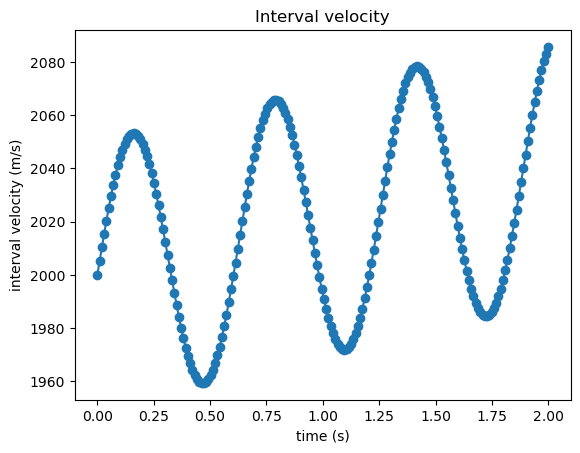

In [9]:
v0 = 2000
alpha = 50
beta = 20
omega = 10
t = np.linspace(0,2,200)

v_int = calc_v_int(v0,alpha,beta,omega,t)

plt.plot(t,v_int, "-o")
plt.xlabel("time (s)")
plt.ylabel("interval velocity (m/s)")
plt.title("Interval velocity")


b. Describe how each of the parameters v0, α, β, and ω influence the character of
the interval velocity. 

### $v_0$

Changing $v_0$ sets the initial value of velocity (assuming $t = 0$ initially) and applies a constant offset of that value to the interval velocity. The effects of varying $v_0$ are shown in the first row of plots below.

### $\alpha$

$\alpha$ sets the amplitude of the sine wave, this means that a high alpha results in large oscillations in the interval velocity, while smaller alpha values result in smaller oscillations. The effects of varying $\alpha$ are shown in the second row of plots below.


### $\omega$

$\omega$ sets the angular frequency of the sine term. High $\omega$ means lots of fast oscillations, while low $\omega$ results in slower oscillations. The effects of varying $\omega$ are shown in the third row of plots below.


### $\beta$ 

$\beta$ sets the slope of the change of velocity with time. Positive beta means the velocity increases over time, negative means velocity decreases over time. The effects of varying $\beta$ are shown in the fourth row of plots below.




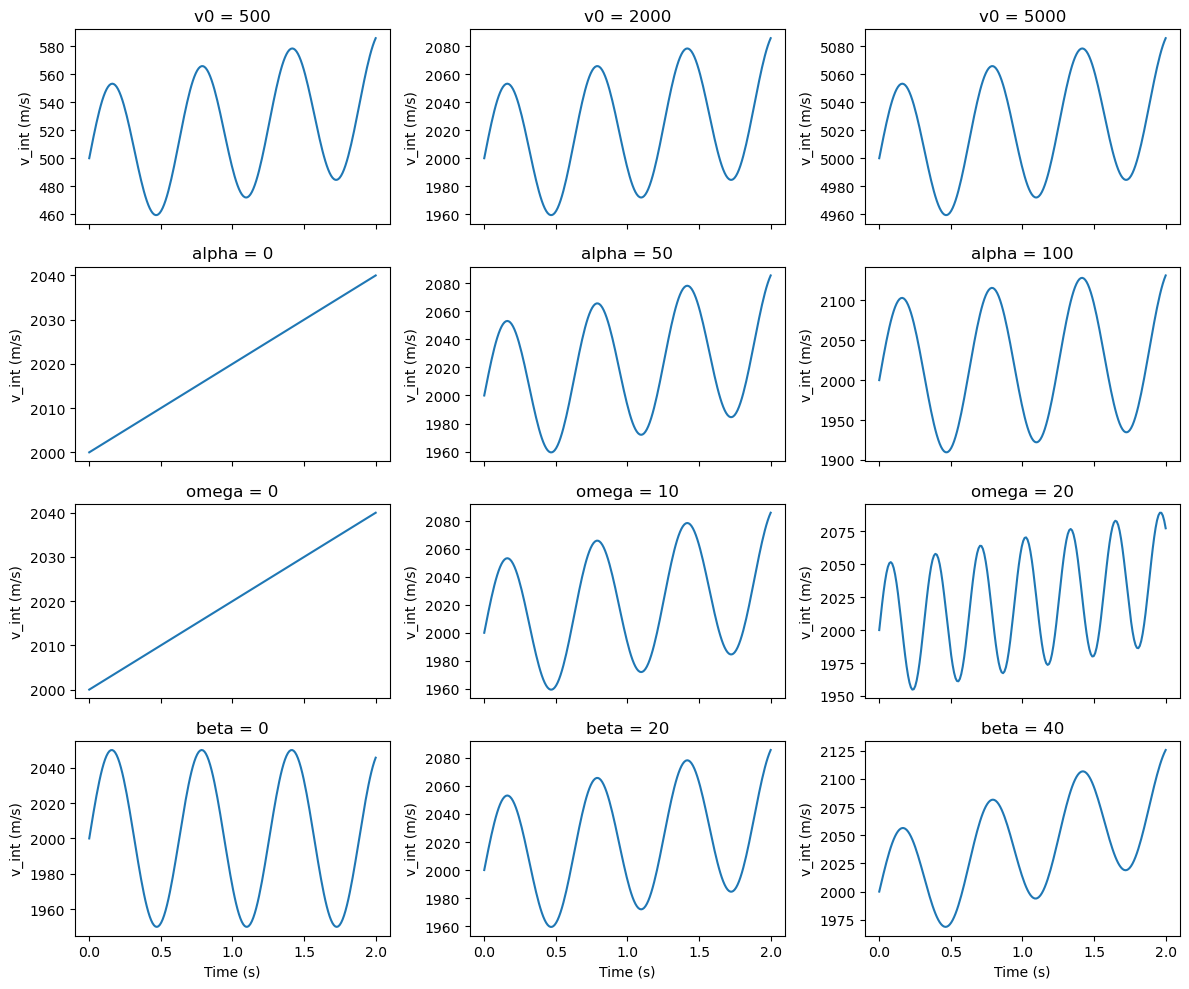

In [13]:
# default parameters
defaults = {
    "v0": 2000,
    "alpha": 50,
    "omega": 10,
    "beta": 20,
}

# parameter variations (low, medium, high)
sweeps = {
    "v0":    [500, 2000, 5000],
    "alpha": [0, 50, 100],
    "omega": [0, 10, 20],
    "beta":  [0, 20, 40],
}

# create 4x3 plot grid
fig, axes = plt.subplots(4, 3, figsize=(12, 10), sharex=True)

for row, (param, values) in enumerate(sweeps.items()):
    for col, val in enumerate(values):
        params = defaults.copy()
        params[param] = val

        v_int = calc_v_int(
            v0=params["v0"],
            alpha=params["alpha"],
            beta=params["beta"],
            omega=params["omega"],
            t=t,
        )

        ax = axes[row, col]
        ax.plot(t, v_int)
        ax.set_title(f"{param} = {val}")
        ax.set_ylabel("v_int (m/s)")

for ax in axes[-1]:
    ax.set_xlabel("Time (s)")

plt.tight_layout()
plt.show()